# Exercise 1 : Fibonacci Series

## 1-1 : 標準數列

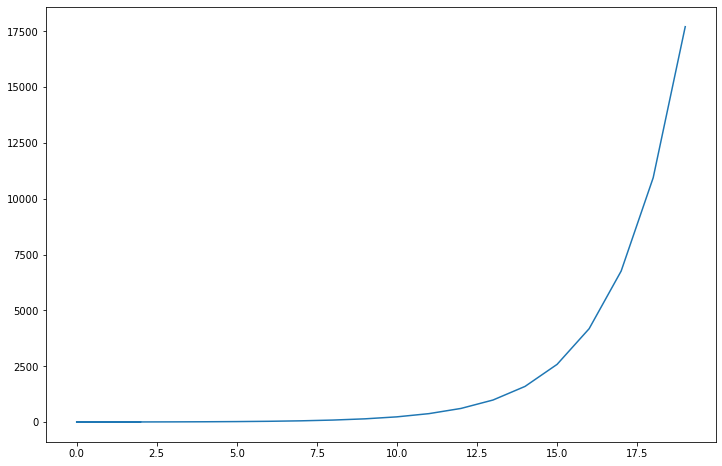

In [20]:
import matplotlib.pyplot as plt

x = [1,1]
n = [1,2]
for i in range(20):
    x.append(x[-1]+x[-2]);
    n.append(i)
    
plt.figure(1,figsize=(12,8))
plt.plot(n,x)

## 1-2 : 改變初值

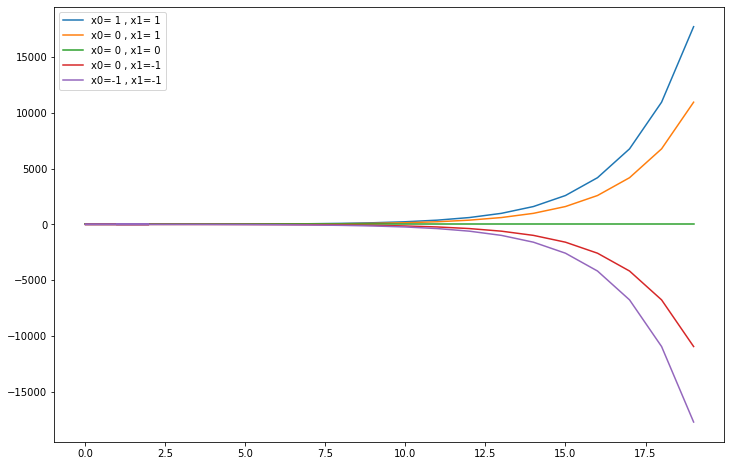

In [28]:
import matplotlib.pyplot as plt
plt.figure(1,figsize=(12,8))
series_list= [[1,1],[0,1],[0,0],[0,-1],[-1,-1]]

for series in series_list:
    x_0 = series[0]
    x_1 = series[1]
    x = [x_0,x_1]
    n = [1,2]
    for i in range(20):
        x.append(x[-1]+x[-2]);
        n.append(i)
    plt.plot(n,x,label="x0={:>2d} , x1={:>2d}".format(x_0,x_1))

plt.legend()

# Exercise 2 : 指數增長模型

## 1-1 : 單一數列

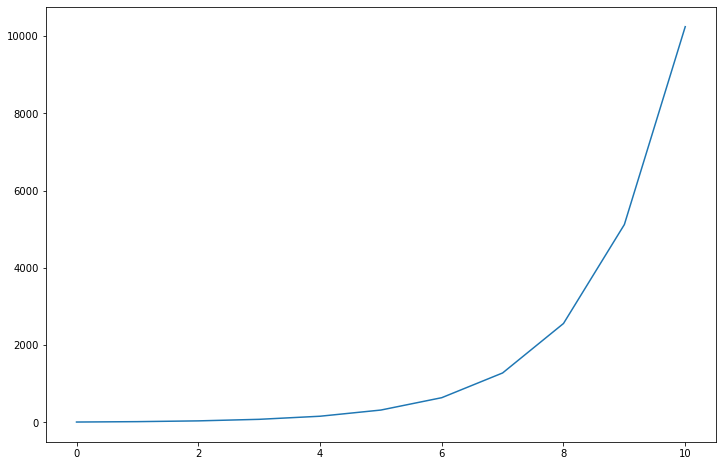

In [46]:
r = 1.0
N_0 = 10
dt = 1 #[year]

N = [N_0]
t = [0]

for i in range(10):
    dN = r * N[-1] * dt
    N.append(N[-1]+dN)
    t.append(t[-1]+dt)
    
plt.figure(1,figsize=(12,8))
plt.plot(t,N)

## 1-2 : 改變初值

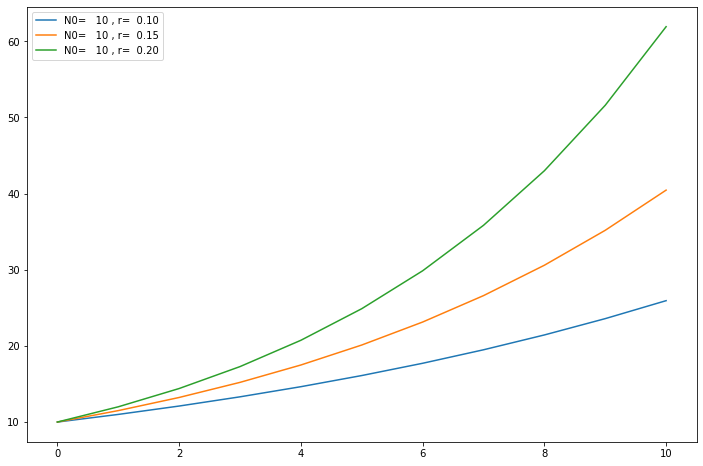

In [52]:
plt.figure(1,figsize=(12,8))

dt = 1 #[year]
series_list= [[10,+0.1],[10,+0.15],[10,+0.20]]

for series in series_list:
    N0 = series[0]
    r = series[1]
    
    N = [N0]
    t = [0]
    for i in range(10):
        dN = r * N[-1] * dt
        N.append(N[-1]+dN)
        t.append(t[-1]+dt)
    plt.plot(t,N,label="N0={:>5d} , r={:>6.2f}".format(N0,r))

plt.legend()


## 1-3 : 加入死亡率

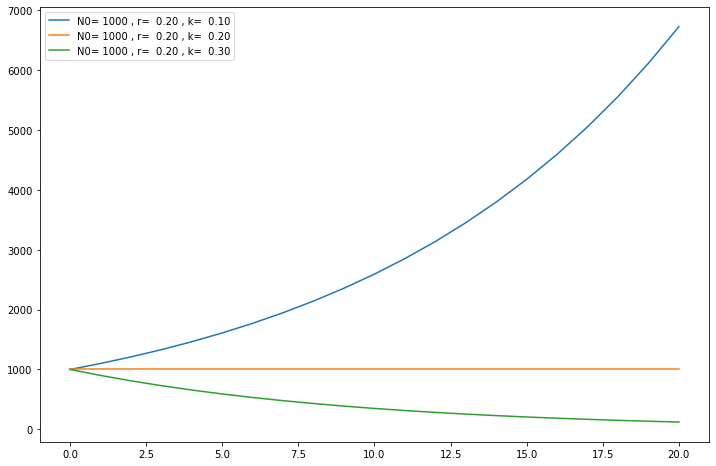

In [56]:
plt.figure(1,figsize=(12,8))

dt = 1 #[year]
series_list= [[1000,0.2,0.1],[1000,0.2,0.2],[1000,0.2,0.3]]

for series in series_list:
    N0 = series[0]
    r = series[1]
    k = series[2]
    
    N = [N0]
    t = [0]
    for i in range(20):
        dN = (r * N[-1] - k * N[-1]) * dt
        N.append(N[-1]+dN)
        t.append(t[-1]+dt)
    plt.plot(t,N,label="N0={:>5d} , r={:>6.2f} , k={:>6.2f}".format(N0,r,k))

plt.legend()

# Exercise 3 : SIR 模型

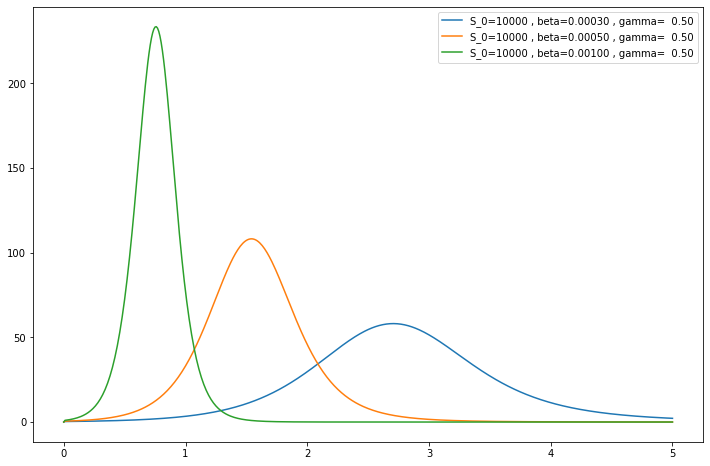

In [117]:
plt.figure(1,figsize=(12,8))

dt = 0.01 #[week]
series_list= [
    [10000,10,0,0.0003,0.5],
    [10000,10,0,0.0005,0.5],
    [10000,10,0,0.001,0.5],
]

for series in series_list:
    S0 = series[0]
    I0 = series[1]
    R0 = series[2]
    beta = series[3]
    gamma = series[4]
    
    S = [S0]
    I = [I0]
    R = [R0]
    mds = [0]
    N = [S0+I0+R0]
    t = [0]
    
    for i in range(500):
        dS =  -beta * I[-1] * S[-1] * dt
        dI = ( beta * I[-1] * S[-1]  - gamma * I[-1]) * dt
        dR = gamma * I[-1] * dt
        #print("S={:10.3f},I={:10.3f},R={:10.3f},dS={:10.3f},dI={:10.3f},dR={:10.3f},N={:10.3f}".format(S[-1],I[-1],R[-1],dS,dI,dR,N[-1]))
        
#         dS = max(min(dS,0),-S[-1])
#         dR = max(min(dR,I[-1]),0)
#         dI = max(min(dI,-dS),-dR)
        
        newS = S[-1] + dS
        newI = I[-1] + dI
        newR = R[-1] + dR
        
        S.append(newS)
        I.append(newI)
        R.append(newR)
        mds.append(-dS)
        N.append(newS+newI+newR)
        
        t.append(t[-1]+dt)
    plt.plot(t,mds,label="S_0={:>5d} , beta={:>6.5f} , gamma={:>6.2f}".format(S0,beta,gamma))


plt.legend()


# Workshop : 地轉風模型

## 牛頓第二運動定律
$$ \vec{F} = m\vec{a} $$
只考慮二維的話，
$$ F_x = ma_x \\
   F_y = ma_y $$
或是
$$ \dfrac{Du}{Dt} = \dfrac{1}{m} F_x = \dfrac{1}{m}( F_{gx} + F_{cx}) \\
   \dfrac{Dv}{Dt} = \dfrac{1}{m} F_y = \dfrac{1}{m}( F_{gy} + F_{cy})$$
假設體積是 $1[m^3]$，則有
$$ \dfrac{Du}{Dt} = \dfrac{1}{\rho} F_{gx} + f\cdot v\\
   \dfrac{Dv}{Dt} = \dfrac{1}{\rho} F_{gy} - f\cdot u\\ $$

## 地轉風方程式
$$ \dfrac{Du}{Dt} = - \dfrac{1}{\rho}\dfrac{\partial P}{\partial x} + f\cdot v \\
  \dfrac{Dv}{Dt} = - \dfrac{1}{\rho}\dfrac{\partial P}{\partial y} - f\cdot u $$
  
其中 $f = 2\Omega sin\phi,\ \ \Omega\sim 10^{-4}\ [1/s]$

將他離散化
$$ \dfrac{\Delta u}{\Delta t} = - \dfrac{1}{\rho}\dfrac{\Delta_x  P}{\Delta_x  x} + f\cdot v \\
  \dfrac{\Delta v}{\Delta t} = - \dfrac{1}{\rho}\dfrac{\Delta_y  P}{\Delta_y  y} - f\cdot u $$
  
或是
$$ \Delta u = \left(- \dfrac{1}{\rho}\dfrac{\Delta_x  P}{\Delta_x  x} + f\cdot v \right) \Delta t\\
  \Delta v = \left(- \dfrac{1}{\rho}\dfrac{\Delta_y  P}{\Delta_y  y} - f\cdot u \right) \Delta t$$

或是
$$ \Delta u = \left(- \dfrac{1}{\rho}\dfrac{P_{x+1} - P_{x-1}}{2\Delta x} + f\cdot v \right) \Delta t\\
  \Delta v = \left(- \dfrac{1}{\rho}\dfrac{P_{y+1} - P_{y-1}}{2\Delta y} - f\cdot u \right) \Delta t$$

## 求出每一時刻的速度
$$ 
u_{t+1} = u_t + \Delta u \\
v_{t+1} = v_t + \Delta v 
$$

## 求出每一時刻的位置
$$ 
x_{t+1} = x_t + u \Delta t \\
y_{t+1} = y_t + v \Delta t
$$


## W-1 : 畫出氣壓場

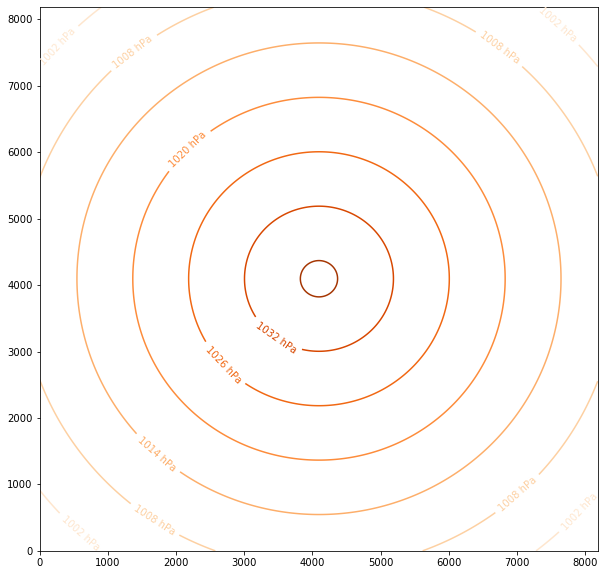

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm



def draw_my_P(grid_dx:float,pressure_field:np.array=None):
    p_field = pressure_field
    xx,yy = np.indices((p_field.shape[0],p_field.shape[1])) * grid_dx
    cs = plt.contour(xx,yy,p_field,cmap="Oranges")
    plt.clabel(cs,inline=True,fmt="%d hPa")

    
# p_field circle
dx_km = 8
p_field = np.ones((1024,1024))
for i in range(1024):
    for j in range(1024):
        p_field[i,j] = - np.sqrt( (i - 512) ** 2 + (j - 512) ** 2 ) / 512 * 30 + 1040
        
# dx_km = 4    
#p_field_a = np.sin(-np.mgrid[0:np.pi:np.pi/1024,0:np.pi:np.pi/1024][0])
#p_field_b = np.sin(np.mgrid[0:np.pi:np.pi/1024,0:np.pi:np.pi/1024][1])
#p_field = p_field_a * p_field_b * 30 + 1013

# dx_km = 4
# p_field_a = np.sin(-np.mgrid[0:np.pi:np.pi/1024,0:np.pi:np.pi/1024][0])
# p_field_b = np.sin(np.mgrid[0:np.pi:np.pi/1024,0:np.pi:np.pi/1024][1])
# p_field = + (p_field_a + p_field_b) * 20 + 1010


fig = plt.figure(1,figsize=(10,10))
plt.clf()
draw_my_P(dx_km,pressure_field=p_field)        

## W-2 : x,y,u,v 預測下一點

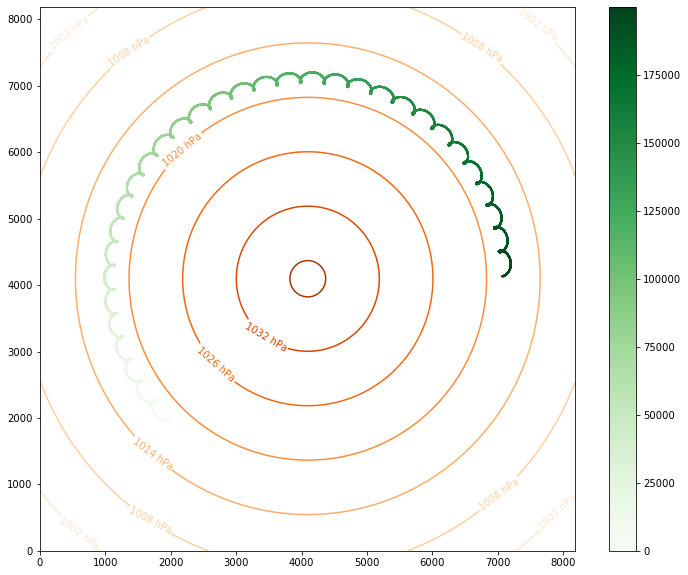

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

def rint(x):
    return int(round(x))
    
def xy_predict(
    p_field:np.array, #[hPa]
    grid_dx:float, #[m]
    current_point:tuple=(256,256),  #[km]
    current_velocity:tuple=(10,10), #[m/s]
    latitude:float=45,
    dt:float=0.1,
)->tuple:
    rho = 1.225
    omega = 7.2921E-5 
    u = current_velocity[0]
    v = current_velocity[1]     
    _latitude = latitude / 180 * np.pi
    
    x_idx = rint(current_point[0] / grid_dx)
    y_idx = rint(current_point[1] / grid_dx)
    
    if not( p_field.shape[0]-2 > x_idx >=0 and p_field.shape[1]-2 > y_idx  >=0) :
        return np.nan,np.nan,np.nan,np.nan
       

    du =  ( -1/rho * (p_field[x_idx+1,y_idx]-p_field[x_idx,y_idx]) * 100 / ( grid_dx *1000) + 2 * omega * np.sin(_latitude) * v) * dt
    dv =  ( -1/rho * (p_field[x_idx,y_idx+1]-p_field[x_idx,y_idx]) * 100 / ( grid_dx *1000) - 2 * omega * np.sin(_latitude) * u) * dt
    
    new_u = u + du
    new_v = v + dv
    
    new_x = current_point[0] + u * dt /1000
    new_y = current_point[1] + v * dt /1000
    
    return new_x,new_y,new_u,new_v
    


# p_field circle
dx_km = 8
p_field = np.ones((1024,1024))
for i in range(1024):
    for j in range(1024):
        p_field[i,j] = - np.sqrt( (i - 512) ** 2 + (j - 512) ** 2 ) / 512 * 30 + 1040
        

fig = plt.figure(1,figsize=(12,10))
plt.clf()
draw_my_P(dx_km,pressure_field=p_field)


# start point and initial velocity
x,y = 2000,2000
u,v = +2,0
iteration = 200000

x_points = []
y_points = []
t_points = []
v_value_points = []
for i in range(iteration):
    current_xy_point = (x,y)
    current_uv = (u,v)
    x,y,u,v = xy_predict(p_field,dx_km,current_xy_point,current_uv,dt=10)
    if np.isnan(x) or np.isnan(y):
        break
    if i % 10 ==  0:
        x_points.append(x)
        y_points.append(y)
        t_points.append(i)
        v_value_points.append(np.sqrt(u*u+v*v))
plt.scatter(x_points,y_points,s=1,c=t_points,cmap="Greens")
plt.colorbar()

## W-3 : 多軌跡風場

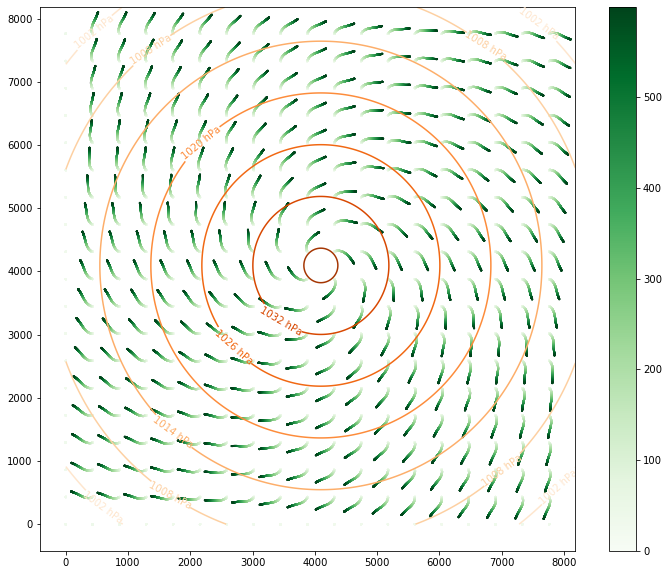

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

def xy_predict(
    p_field:np.array, #[hPa]
    grid_dx:float, #[m]
    current_point:tuple=(256,256),  #[km]
    current_velocity:tuple=(10,10), #[m/s]
    latitude:float=45,
    dt:float=0.1,
)->tuple:
    rho = 1.225
    omega = 7.2921E-5 
    fraction_coeff = 0.00005
    u = current_velocity[0]
    v = current_velocity[1]     
    _latitude = latitude / 180 * np.pi
    
    x_idx = rint(current_point[0] / grid_dx)
    y_idx = rint(current_point[1] / grid_dx)
    
    if not( p_field.shape[0]-2 > x_idx >=0 and p_field.shape[1]-2 > y_idx  >=0) :
        return np.nan,np.nan,np.nan,np.nan
       

    du =  ( -1/rho * (p_field[x_idx+1,y_idx]-p_field[x_idx,y_idx]) * 100 / ( grid_dx *1000) + 2 * omega * np.sin(_latitude) * v - fraction_coeff * u) * dt
    dv =  ( -1/rho * (p_field[x_idx,y_idx+1]-p_field[x_idx,y_idx]) * 100 / ( grid_dx *1000) - 2 * omega * np.sin(_latitude) * u - fraction_coeff * v) * dt
    
    new_u = u + du
    new_v = v + dv
    
    new_x = current_point[0] + u * dt /1000
    new_y = current_point[1] + v * dt /1000
    
    return new_x,new_y,new_u,new_v



track_num = 20
track_integral_steps = 600
x_trackpoint = np.linspace(0,p_field.shape[0]*dx_km,num=track_num)
y_trackpoint = np.linspace(0,p_field.shape[1]*dx_km,num=track_num)
xv,yv = np.meshgrid(x_trackpoint,y_trackpoint)
xv = xv.flatten()
yv = yv.flatten()


x_points = []
y_points = []
t_points = []
v_value_points = []

for track_idx in range(len(xv)):
    x,y = xv[track_idx],yv[track_idx]
    u,v = 0,0
    for i in range(track_integral_steps):
        #print(x,y,u,v)
        current_xy_point = (x,y)
        current_uv = (u,v)
        x,y,u,v = xy_predict(p_field,dx_km,current_xy_point,current_uv,dt=120)
        if np.isnan(x) or np.isnan(y):
            break
        if i % 1 ==  0:
            x_points.append(x)
            y_points.append(y)
            t_points.append(i)
            v_value_points.append(np.sqrt(u*u+v*v))

fig = plt.figure(1,figsize=(12,10))
plt.clf()
draw_my_P(dx_km,pressure_field=p_field)
            
plt.scatter(x_points,y_points,s=1,c=t_points,cmap="Greens")
plt.colorbar()



## W-4 : 加入摩擦力

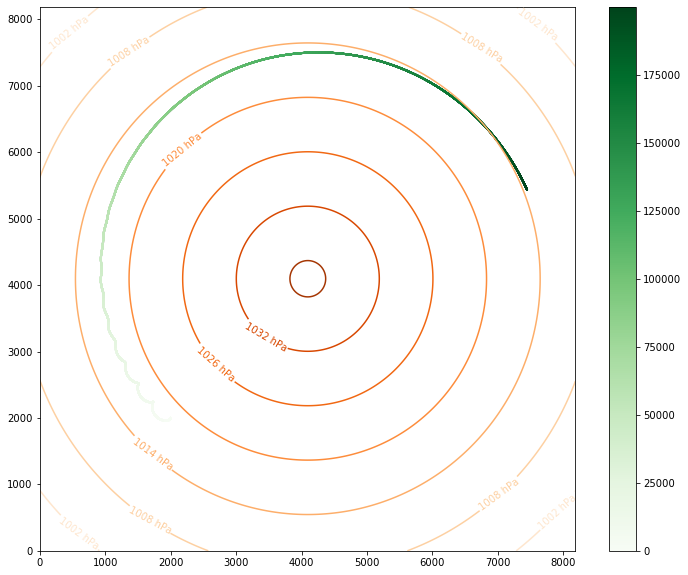

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

def rint(x):
    return int(round(x))
    
def xy_predict(
    p_field:np.array, #[hPa]
    grid_dx:float, #[m]
    current_point:tuple=(256,256),  #[km]
    current_velocity:tuple=(10,10), #[m/s]
    latitude:float=45,
    dt:float=0.1,
)->tuple:
    rho = 1.225
    omega = 7.2921E-5 
    fraction_coeff = 0.000005
    u = current_velocity[0]
    v = current_velocity[1]     
    _latitude = latitude / 180 * np.pi
    
    x_idx = rint(current_point[0] / grid_dx)
    y_idx = rint(current_point[1] / grid_dx)
    
    if not( p_field.shape[0]-2 > x_idx >=0 and p_field.shape[1]-2 > y_idx  >=0) :
        return np.nan,np.nan,np.nan,np.nan
       

    du =  ( -1/rho * (p_field[x_idx+1,y_idx]-p_field[x_idx,y_idx]) * 100 / ( grid_dx *1000) + 2 * omega * np.sin(_latitude) * v - fraction_coeff * u) * dt
    dv =  ( -1/rho * (p_field[x_idx,y_idx+1]-p_field[x_idx,y_idx]) * 100 / ( grid_dx *1000) - 2 * omega * np.sin(_latitude) * u - fraction_coeff * v) * dt
    
    new_u = u + du
    new_v = v + dv
    
    new_x = current_point[0] + u * dt /1000
    new_y = current_point[1] + v * dt /1000
    
    return new_x,new_y,new_u,new_v


# p_field circle
dx_km = 8
p_field = np.ones((1024,1024))
for i in range(1024):
    for j in range(1024):
        p_field[i,j] = - np.sqrt( (i - 512) ** 2 + (j - 512) ** 2 ) / 512 * 30 + 1040

        

fig = plt.figure(1,figsize=(12,10))
plt.clf()
draw_my_P(dx_km,pressure_field=p_field)


# start point and initial velocity
x,y = 2000,2000
u,v = +2,0

x_points = []
y_points = []
t_points = []
v_value_points = []
for i in range(200000):
    #print(x,y,u,v)
    current_xy_point = (x,y)
    current_uv = (u,v)
    x,y,u,v = xy_predict(p_field,dx_km,current_xy_point,current_uv,dt=10)
    if np.isnan(x) or np.isnan(y):
        break
    if i % 10 ==  0:
        x_points.append(x)
        y_points.append(y)
        t_points.append(i)
        v_value_points.append(np.sqrt(u*u+v*v))
plt.scatter(x_points,y_points,s=1,c=t_points,cmap="Greens")
plt.colorbar()